In [1]:
import pandas as pd
import numpy as np
import earthchem as ec

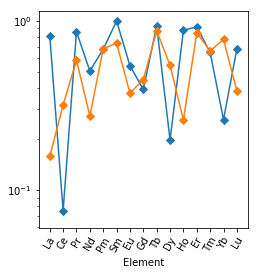

In [3]:
reels = ec.geochem.REE(output='string')
df = pd.DataFrame({k: v for k,v in zip(reels, np.random.rand(len(reels), 2))})
ec.plot.spiderplot(df)

TernaryAxesSubplot: -9223371912178745151

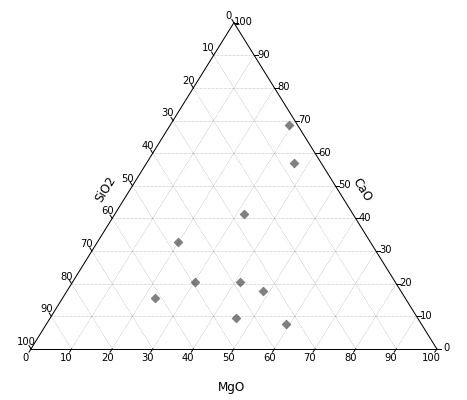

In [4]:
oxides = ['MgO', 'CaO', 'SiO2']
df = pd.DataFrame({k: v for k,v in zip(oxides, np.random.rand(len(oxides), 10))})
ec.plot.ternaryplot(df);